38.0


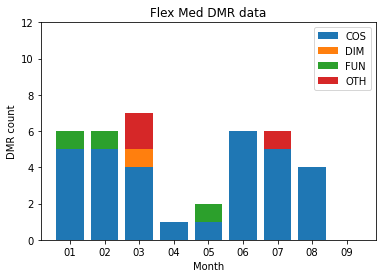

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('DMR.csv')
#print(df.iloc[1,:])

#format time & set index
df['Sys Date']=pd.to_datetime(df['Sys Date'])
df['Sys Date']=df['Sys Date'].dt.strftime('%m')
df=df.set_index("Sys Date")

#Class aggregate
df['Class']= np.where((df['Class']=="INDUSTRIAL:Metal Fittings"), "Fittings", df['Class'])
df['Class']= np.where((df['Class']=="OTHER:Metal Fittings"), "Fittings", df['Class'])
df['Class']= np.where((df['Class']=="AERO:Metal Fittings"), "Fittings", df['Class'])

df['Class']= np.where((df['Class']=="AM-PM:Finished Item-Medical"), "AM-PM", df['Class'])
df['Class']= np.where((df['Class']=="AM-PM:Comp. Medical: FL"), "AM-PM", df['Class'])

df['Class']= np.where((df['Class']=="INDUSTRIAL:Finished Assy"), "Industrial", df['Class'])
df['Class']= np.where((df['Class']=="READYFLEX:Finished Assy"), "Industrial", df['Class'])

df['Class']= np.where((df['Class']=="AERO:Finished Assy"), "Aerospace", df['Class'])

df['Class']= np.where((df['Class']=="MEDICAL:Finished Assy"), "Flex Med", df['Class'])

#Class Match column & set rows to 0
cls="Flex Med"

df["TF"]=df['Class']==cls
df.loc[df["TF"]==False]=0

#pivot table
p1=pd.pivot_table(df,index='Sys Date',columns='DefGroup',values='DMR Number',aggfunc='count')
p1=p1.fillna(0)
p1=p1.drop(columns=[0])
#print(p1)

#barplot
x=p1.index.to_numpy()
lbl=p1.columns.to_numpy()
hor_len=len(lbl)
ver_len=len(p1.iloc[:,0].to_numpy())
bot=[0]*ver_len
#print(ver_len)
#print(hor_len)
for i in range(0,hor_len):
    y=p1.iloc[:,i].to_numpy()
    #print(y)
    #print(x)
    plt.bar(x,y,bottom=bot,label=lbl[i])
    bot=np.add(bot,y)
ax =plt.subplot()
ax.legend()
ax.set_ylabel("DMR count")
ax.set_title(cls+" DMR data")
ax.set_xlabel("Month")
ax.set_ylim(0,np.max(bot)+5)
plt.savefig("%s.png" % cls)
print(np.sum(bot))
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


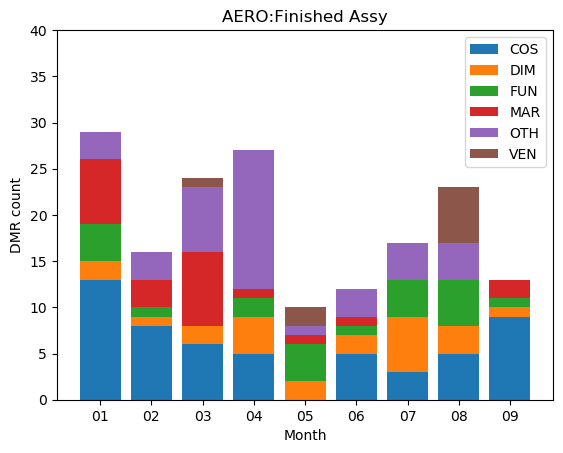